# Marcos Barragán Corredera

https://www.linkedin.com/in/marcos-barragán-corredera-7415931b7

# Adrián González Retamosa

https://www.linkedin.com/in/adrián-gonzález-retamosa-b283a51b3

## Machine Learning

## CUNEF

### 04/12/2020

## Logistic Regression Model

In [127]:
import pandas as pd
import pickle
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, classification_report
import scikitplot as skplt
import matplotlib.pyplot as plt
import matplotlib.pyplot as pltimport 
from sklearn.metrics import plot_confusion_matrix

Load our X and Y train and test data:

In [34]:
X_train = pd.read_csv('../data/x_train.csv')
X_test = pd.read_csv('../data/x_test.csv')
Y_train = pd.read_csv('../data/y_train.csv')
Y_test = pd.read_csv('../data/y_test.csv')

Load data from pipeline:

In [35]:
pl2 = '../pipelines/tratamiento1.sav'
tratamiento1 = pickle.load(open(pl2, 'rb'))

Now it is time to build the logistic regression model:

In [44]:
logistic_model = Pipeline(steps=[
    ('preprocesador', tratamiento1),
    ('clasificador', LogisticRegression(max_iter=1500, 
                                        random_state=1789))])

logistic_model.fit(X_train, Y_train)

/Users/adrian_gr/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Pipeline(steps=[('preprocesador',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['int_rate', 'annual_inc', 'fico_range_low', 'fico_range_high',
       'pub_rec', 'total_acc', 'last_fico_range_high', 'last_fico_range_low',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_rcnt_rev_tl_op', 'mort_acc', 'num_bc_sats', 'num_tl_120dpd_2m',
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim',
       'total_bal_ex_mort', 'total_bc_limit'],
      dtype='object'))])),
     

Score of LR model for our training data:

In [147]:
logistic_model.score(X_train, Y_train)

0.8943724442328912

__Score__ of LR model for our __testing data__:

In [148]:
logistic_model.score(X_test, Y_test)

0.895267492679831

Using the LR model to create our prediction vector:

In [45]:
Y_pred = logistic_model.predict(X_test)

In [ ]:
#Probabilidad de ser 0 y de ser 1, de no pagar y de pagar.
Y_pro = logistic_model.predict_proba(X_test)

If we print the results of logistic regression model for our data:

In [46]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78     34886
           1       0.92      0.94      0.93    103772

    accuracy                           0.90    138658
   macro avg       0.87      0.85      0.86    138658
weighted avg       0.89      0.90      0.89    138658



In the prediction, if we say somebody is not going to pay, we will hit the correct result 81% of the times. By contrast, if we say somebody is going to pay, we hit the correct result 92% of the times.  

Globally, we get an accuracy of 90%, which is great.

Let's plot out the ROC curve, confusion matrices and cumulative gains curve to see their behaviour for the predicted data.

In [133]:
def roc(model, title):
    
    y_pred_prob = model.predict_proba(X_test)
    
    skplt.metrics.plot_roc(y_test, y_pred_prob) # un roc con todas las metricas
    plt.title(f"ROCs curve for {title}.");

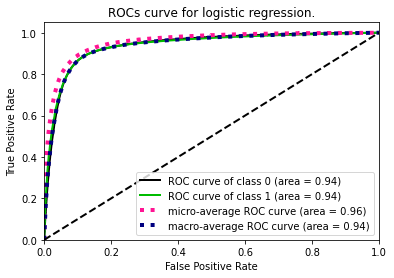

In [134]:
roc(logistic_model, 'logistic regression')

Looking at the AUC values (area under de curve, when it says "area = " in the legend), we notice that we are achieving such a good result for every model.

This is also noticeable (and easier to interpret) by plotting both confusion matrix and normalized confusion matrix.

__Confusion Matrix:__

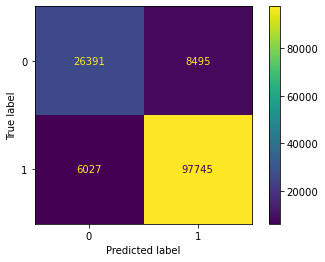

In [146]:
plot_confusion_matrix(logistic_model, X=X_test, y_true=Y_test);

__Normalized Confusion Matrix__:

In case of testing data:

For the LR-predicted data we get:

+ A 94% of hits when we predict somebody is going to pay.

+ A 76% of hits when predicting somebody is not going to pay.

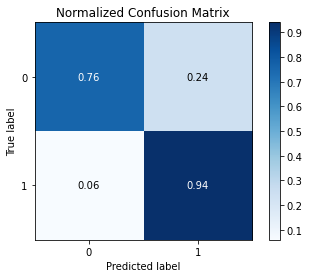

In [145]:
modelprediction_labels = logistic_model.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, Y_pred, normalize = True);

__Cumulative gains curve__:

If we plot this CG curve, we get that is more efficient to look at class-0-loan-status people, because analyzing the 20% of the data sample we get almost 65% of defaulters.

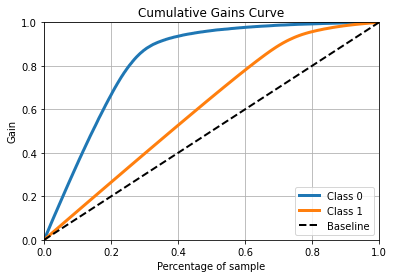

In [101]:
skplt.metrics.plot_cumulative_gain(Y_test, Y_pro);

We save the model as:

In [125]:
model = '../modelos/logistic.sav'
pickle.dump(logistic_model, open(model, 'wb'))

### References

+ https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
+ https://docs.python.org/3/library/pickle.html